In [9]:
# Load your preprocessed dataset
import pandas as pd

df = pd.read_csv('../Data/processed_boston.csv')

# Example new features
df['RM_LSTAT'] = df['rm'] * df['lstat']  # interaction term
df['DIS_squared'] = df['dis'] ** 2       # polynomial feature
df['AGE_CAT'] = pd.cut(df['age'], bins=[0, 50, 80, 100], labels=[0, 1, 2])  # categorical age
df['TAX_PER_ROOM'] = df['tax'] / df['rm']  # new ratio
print(df.columns)



Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'RM_LSTAT', 'DIS_squared', 'AGE_CAT',
       'TAX_PER_ROOM'],
      dtype='object')


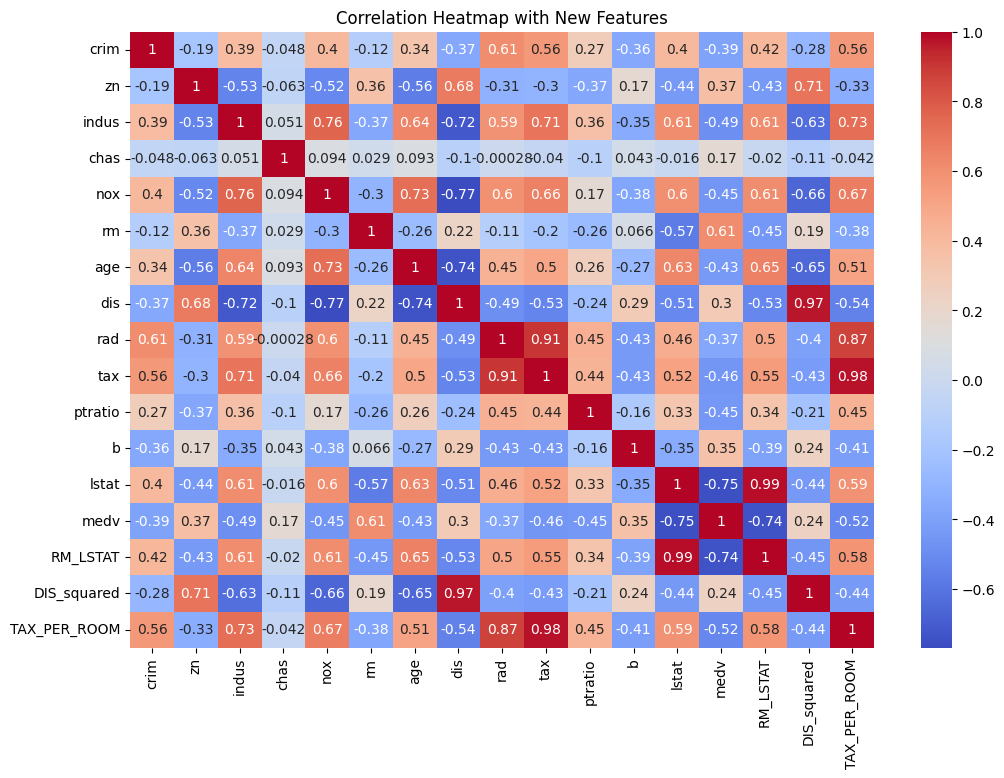

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with New Features")
plt.show()


In [3]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['medv'])
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 14.173997817117431
R²: 0.744783975516633


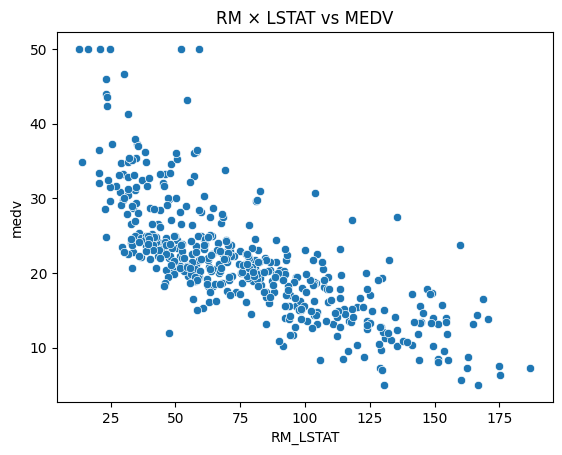

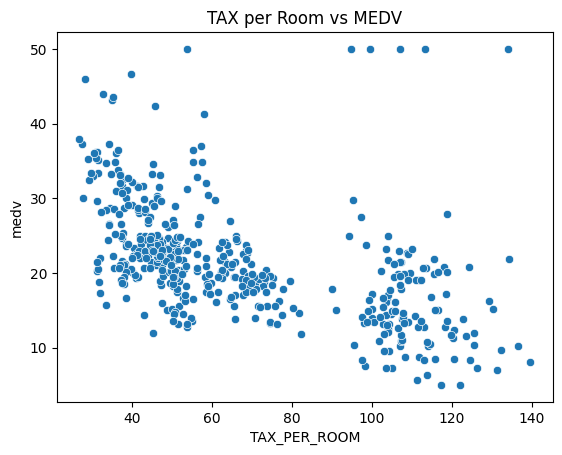

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='RM_LSTAT', y='medv')
plt.title("RM × LSTAT vs MEDV")
plt.show()

sns.scatterplot(data=df, x='TAX_PER_ROOM', y='medv')
plt.title("TAX per Room vs MEDV")
plt.show()


In [11]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'RM_LSTAT', 'DIS_squared', 'AGE_CAT',
       'TAX_PER_ROOM'],
      dtype='object')


In [12]:
# Define the target variable
y = df['medv']

# Train models with both original and engineered features
for label, feature_set in {
    'Base Model': original_features,
    'With Engineered Features': engineered_features
}.items():
    X = df[feature_set]  # Features for the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    r2 = r2_score(y_test, y_pred)  # Calculate R² score

    # Store evaluation metrics
    results[label] = {'MSE': mse, 'R²': r2}

# Print out the results
for label, metrics in results.items():
    print(f"{label} - MSE: {metrics['MSE']:.2f}, R²: {metrics['R²']:.3f}")


Base Model - MSE: 25.34, R²: 0.544
With Engineered Features - MSE: 19.76, R²: 0.644
